<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>AutoML Regression Complete</strong></p> 

In [1]:
from pycaret.regression import * 
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.5f}'.format

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Lectura del File</strong></p> 

In [3]:
dfHousePriceTrain = pd.read_csv("./data/house_price_train.csv")

In [4]:
dfHousePriceTrain.shape

(1460, 81)

In [5]:
dfHousePriceTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
dfHousePriceTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dfHousePriceTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000,1460.00000,1201.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1452.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1379.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,730.50000,56.89726,70.04996,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68526,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1978.50616,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,43.48904,6.32192,2007.81575,180921.19589
std,421.61001,42.30057,24.28475,9981.26493,1.38300,1.11280,30.20290,20.64541,181.06621,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,24.68972,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,496.12302,2.70363,1.32810,79442.50288
min,1.00000,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1900.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,365.75000,20.00000,59.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1961.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,730.50000,50.00000,69.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1980.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,1095.25000,70.00000,80.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,166.00000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2002.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,1460.00000,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,12.00000,2010.00000,755000.00000


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Modeling</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Características a Ignorar</strong></p> 

In [8]:
colIgnore = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities']

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Características Categóricas</strong></p> 

In [9]:
colCateg = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','Street','LotShape',
            'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
            'RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
            'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
            'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleCondition']

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Configuración del Modelo</strong></p> 

In [10]:
exp_1001 = setup(data = dfHousePriceTrain,target='SalePrice',ignore_features= colIgnore,
                 categorical_features=colCateg,normalize = True,
                 log_experiment=True, experiment_name='HousePrice_1001',
                 session_id = 1001)

,Description,Value
0,session_id,1001
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 388)"


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Compare Models</strong></p> 

In [12]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14987.5578,730894914.3374,25821.4924,0.8758,0.1274,0.0881,5.5470
lightgbm,Light Gradient Boosting Machine,17469.1086,841698980.4677,28182.1730,0.8556,0.1442,0.1043,0.1400
gbr,Gradient Boosting Regressor,17084.0545,844117652.6525,28061.6329,0.8543,0.1409,0.1022,0.3710
xgboost,Extreme Gradient Boosting,18342.0661,879422452.4246,29276.3417,0.8423,0.1516,0.1083,1.0950
huber,Huber Regressor,15647.6692,987718593.9794,28144.2647,0.8421,0.1381,0.0947,0.4050
par,Passive Aggressive Regressor,16290.1363,1036395768.6519,29263.4964,0.8335,0.1363,0.0968,0.3510
br,Bayesian Ridge,17864.1974,1091151900.9365,30625.6936,0.8225,0.1526,0.1087,0.2150
rf,Random Forest Regressor,18649.1424,1064004063.9645,31658.0540,0.8175,0.1576,0.1124,0.7420
omp,Orthogonal Matching Pursuit,17668.5415,1194293715.5351,30916.1706,0.8086,0.1527,0.1081,0.0370
ridge,Ridge Regression,18429.2187,1220039628.1690,31976.5031,0.8027,0.1663,0.1123,0.0370


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generar el mejor modelo</strong></p> 

In [11]:
catboost_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13634.7482,384677654.6238,19613.2010,0.9165,0.1039,0.0776
1,13892.8021,514667725.7625,22686.2894,0.8817,0.1196,0.0831
2,16142.9545,1441385722.4425,37965.5860,0.7678,0.1456,0.0914
3,17835.8380,1859014604.0979,43116.2916,0.7244,0.1360,0.0887
4,15652.6677,534343141.8682,23115.8634,0.8966,0.1478,0.1011
5,13465.3541,378813273.0933,19463.1260,0.9373,0.1349,0.0902
6,15310.7059,494028508.7998,22226.7521,0.9129,0.1274,0.0903
7,15377.6259,483421805.0842,21986.8553,0.9175,0.1243,0.0916
8,12529.5550,336203690.7594,18335.8581,0.9191,0.0960,0.0718
9,16033.3270,882393016.8425,29705.1009,0.8839,0.1383,0.0956


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Hiperparametrización</strong></p> 

In [15]:
#tuned_catboost_model = tune_model(catboost_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16145.8235,535491332.5042,23140.6857,0.8838,0.1215,0.0925
1,16504.6820,694821839.2790,26359.4734,0.8403,0.1441,0.1022
2,18584.3714,1159032908.6341,34044.5724,0.8133,0.1644,0.1154
3,19649.7245,1738628165.6814,41696.8604,0.7423,0.1443,0.1043
4,19928.6209,798632600.6137,28260.0885,0.8454,0.1818,0.1335
5,17875.3954,647636161.6255,25448.6967,0.8928,0.1620,0.1175
6,19425.3970,827484059.0522,28766.0226,0.8541,0.1619,0.1171
7,17972.4750,717730875.2457,26790.4997,0.8775,0.1531,0.1083
8,13145.3060,356469956.3942,18880.4120,0.9142,0.1052,0.0796
9,19420.4924,1016996518.4071,31890.3829,0.8662,0.1610,0.1165


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Listado de Gráficas</strong></p> 

In [17]:
plot_model?

In [20]:
plot_model(catboost_model, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


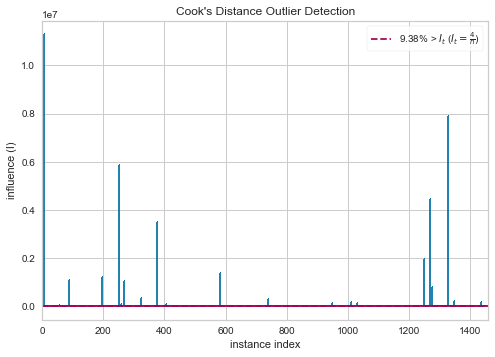

In [22]:
plot_model(catboost_model, plot = 'cooks')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Características mas importantes</strong></p> 

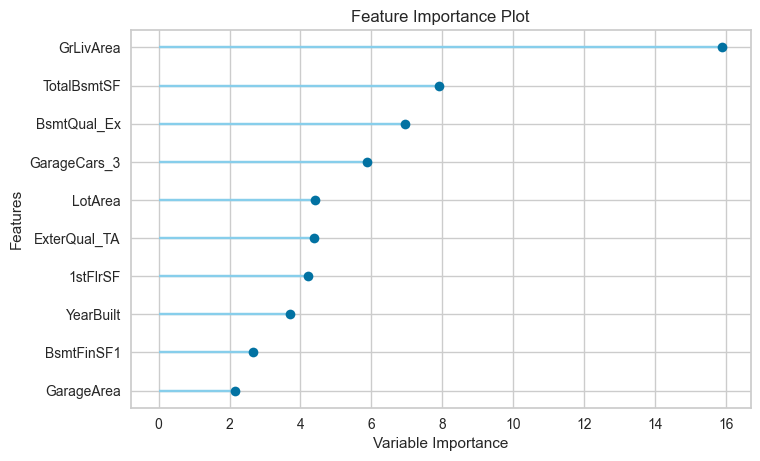

In [13]:
plot_model(catboost_model, plot = 'feature')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de Error de Predicción</strong></p> 

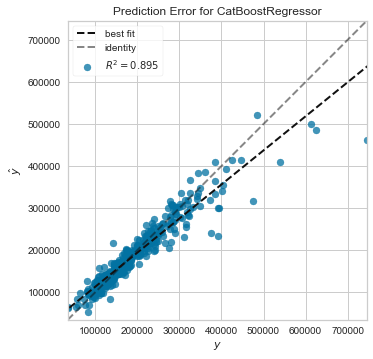

In [14]:
plot_model(catboost_model, plot = 'error')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Comparación de Errores</strong></p> 

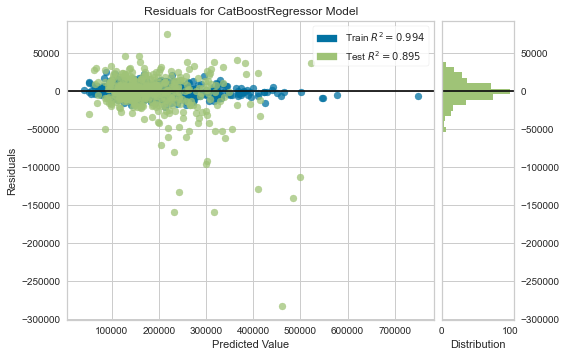

In [15]:
plot_model(catboost_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Interpretacion</strong></p> 

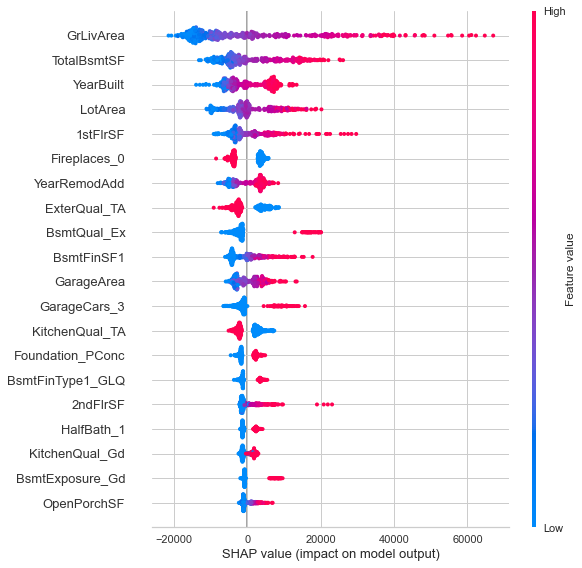

In [16]:
interpret_model(catboost_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir Valores y Comaprar con Reales</strong></p> 

In [10]:
predict_model(catboost_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,15669.7540,813710723.1219,28525.6152,0.8949,0.1234,0.0839


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,0.90056,-0.31849,-0.45967,0.53463,-0.55724,0.32883,-0.29619,-0.55141,-0.30178,0.18895,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,149700,155471.03019
1,-0.42782,0.05367,-2.84117,0.48630,-0.55724,-0.97379,-0.29619,0.19894,-0.90352,-0.29238,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,100000,93166.11252
2,0.05925,0.20822,0.99569,0.82462,-0.55724,0.52422,-0.29619,-1.00299,-0.54158,-0.91124,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,215000,240000.05159
3,-0.69349,-0.40382,-1.51811,-1.68862,-0.55724,0.22245,-0.29619,-0.98703,-0.83469,-1.18374,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,103600,113277.26021
4,0.19209,0.30606,-0.19506,-0.96365,0.05115,-0.47228,-0.29619,2.15121,1.51012,1.44194,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,142600,145510.70479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.01497,-0.01762,-0.42659,-1.30197,-0.55161,0.01620,-0.29619,-0.22299,-0.30178,-0.63619,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,114500,117142.45592
435,-0.42782,-0.27538,-0.19506,-0.96365,-0.55724,0.41784,-0.29619,-0.83650,-0.48829,-0.50121,...,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,119900,118844.78069
436,0.01497,-0.36313,-2.01426,0.29297,-0.55724,1.12994,-0.29619,-0.92545,0.15342,-0.87049,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,107500,136552.04880
437,-0.87061,-0.58250,-0.79043,-1.68862,-0.55724,-0.10755,-0.29619,0.11683,-0.09749,-0.40189,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,159000,151781.84023


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Empaquetar Modelo</strong></p> 

In [11]:
final_catboost_model = finalize_model(catboost_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir con el modelo Empaquetado</strong></p> 

In [12]:
predict_model(final_catboost_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5384.8574,48114952.7353,6936.4943,0.9938,0.0469,0.0341


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,0.90056,-0.31849,-0.45967,0.53463,-0.55724,0.32883,-0.29619,-0.55141,-0.30178,0.18895,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,149700,150963.85079
1,-0.42782,0.05367,-2.84117,0.48630,-0.55724,-0.97379,-0.29619,0.19894,-0.90352,-0.29238,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,100000,97101.63507
2,0.05925,0.20822,0.99569,0.82462,-0.55724,0.52422,-0.29619,-1.00299,-0.54158,-0.91124,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,215000,222724.54433
3,-0.69349,-0.40382,-1.51811,-1.68862,-0.55724,0.22245,-0.29619,-0.98703,-0.83469,-1.18374,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,103600,107931.60951
4,0.19209,0.30606,-0.19506,-0.96365,0.05115,-0.47228,-0.29619,2.15121,1.51012,1.44194,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,142600,141799.36129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.01497,-0.01762,-0.42659,-1.30197,-0.55161,0.01620,-0.29619,-0.22299,-0.30178,-0.63619,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,114500,114499.76031
435,-0.42782,-0.27538,-0.19506,-0.96365,-0.55724,0.41784,-0.29619,-0.83650,-0.48829,-0.50121,...,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,119900,113643.15146
436,0.01497,-0.36313,-2.01426,0.29297,-0.55724,1.12994,-0.29619,-0.92545,0.15342,-0.87049,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,107500,119218.60871
437,-0.87061,-0.58250,-0.79043,-1.68862,-0.55724,-0.10755,-0.29619,0.11683,-0.09749,-0.40189,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,159000,157306.86615


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Salvar Modelo</strong></p> 

In [22]:
save_model(final_catboost_model,'./model/202011110_final_catboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['MSZoning',
                                                             'Exterior1st',
                                                             'Exterior2nd',
                                                             'KitchenQual',
                                                             'Functional',
                                                             'SaleType',
                                                             'Street',
                                                             'LotShape',
                                                             'LandContour',
                                                             'LotConfig',
                                                             'LandSlope',
                                                             'Neighborhood',
                                                       

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Manejo de Experimento</strong></p> 

In [13]:
!mlflow ui

^C


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Producción</strong></p> 

In [40]:
from pycaret.regression import * 
import pandas as pd

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cargar Modelo</strong></p> 

In [47]:
final_catboost_model_loaded = load_model('./model/202011110_final_catboost_model')

Transformation Pipeline and Model Successfully Loaded


In [42]:
dfHousePriceTest = pd.read_csv("./data/house_price_test.csv")

In [43]:
dfHousePriceTest.shape

(1459, 80)

In [44]:
dfHousePriceTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
dfHousePriceTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [46]:
dfHousePriceTest.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir valores en Producción</strong></p> 

In [48]:
test_predictions = predict_model(final_catboost_model_loaded, data=dfHousePriceTest)

In [49]:
test_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,139653.915864
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,177522.888510
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,205891.569222
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,207901.211719
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,194438.412871


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 